In [23]:
import pandas as pd
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Exploring Factors Contributing to Severity of US Motor Vehicle Accidents


### Group Members
* Arshia Vadhani
* Matthew Jacobsen
* Laura Diaz Rodriguez
* Meiyan Liu

# Introduction:
Car accidents remain a leading cause of accidental death worldwide, with various countries permitting individuals as young as 15 to operate vehicles. Numerous factors contribute to the occurrence of car accidents, including but not limited to weather conditions, visibility, vehicle speed, vehicle type, alcohol consumption, drug use, and driver distraction. With the legalization of recreational drugs, increasing alcohol consumption in social settings, and the growing mobile phone use among younger populations, the frequency of car accidents is expected to rise. The consequences of these incidents can vary significantly, ranging from minor injuries to fatalities. This project aims to investigate the key factors contributing to car accidents that can ultimately lead to the development of strategies targeted at keeping people safe.

# Problem Statement
Car accidents are a major global public safety concern, with numerous contributing factors. However, the specific factors that lead to fatal accidents are not as widely understood. This study aims to identify the key contributing factors via correlation to both general car accidents and fatal accidents in particular. By examining possible conducive variables, we seek to better understand the dynamics of these incidents by providing data-driven insights on the average weight of each factor on accident severity.


# Relevancy & Inspiration
The relevance of this problem lies in the persistent and growing nature of car accidents, which continue to pose significant risks to public safety worldwide. With an increasing number of variables influencing these incidents, understanding the root causes of fatal accidents is crucial to mitigating their impact. With the increasing population of drivers, it is essential to prioritize the education of safe driving practices. The most effective way to achieve this is by identifying the key elements that contribute to these dangerous, often fatal, crashes. Research indicates that nearly 77% of the American population has been involved in a motor vehicle accident at some point in their lives. This statistic inspired us to pursue solutions aimed at reducing this number by promoting safer driving behaviors. By identifying the specific factors most strongly linked to car accidents, we aim to gain a clearer understanding of how to prevent them, ultimately contributing to improved road safety.

# Data Source

- Where did our data come from
- Is it a representative sample of US car accidents
- How is the data set organized (grouped by ST_CASE, VEH_NO, PER_NO)


# Variable Descriptions

1. **ST_CASE**: A unique case identifier assigned to each crash record in the dataset. This variable helps distinguish individual incidents.

2. VEH_NO: The vehicle number in a given crash case. It is used to identify and differentiate multiple vehicles involved in the same crash.

3. PER_NO: The person number assigned to each individual in a crash. This variable is useful for identifying specific individuals within a case.

4. AGE: The age of the individual involved in the crash, recorded as a discrete variable ranging from 0 to 97. Individuals aged 97 or older are coded as 97 due to historical data recording practices.

5. GENDER: The gender of the individual involved in the crash. It is coded as:

    1 = Male

    2 = Female

6. YEAR: The year in which the crash occurred. This variable is essential for temporal analysis and trend evaluation.

7.  PER_TYP: The role of the individual in the crash, categorized as:

    1 = Driver

    2 = Passenger

    3 = Stationary non-occupant (SNO) (e.g., someone standing in a building, using a wheelchair, or engaging in recreational activities)

    5 = Pedestrians

    6 = Pedalcyclists

8. INJ_SEV: The severity of the individual's injury in the crash, categorized as:

    0 = No Injury

    1 = Possible Injury

    2 = Minor Injury

    3 = Serious Injury

    4 = Fatal Injury Historical codes with unknown injury severity were reassigned probabilistically to categories 1, 2, and 3.

9. DRINKING: Indicates whether the individual was recorded as having consumed alcohol at the time of the crash:

    0 = No

    1 = Yes The coding for this variable differed in the GES dataset for the years 2001-2008.

10. DRUGS: Records whether the individual was under the influence of drugs at the time of the crash:

    0 = No

    1 = Yes Similar to the drinking variable, the coding for this variable was different in the GES dataset for the years 2001-2008.

11. NUMOCCS: The number of occupants in the vehicle.

    Ranges from 1 to 80.

12. MAKE: The discrete category for the vehicle’s make (manufacturer).

    Ranges from 1 to 98.

    Coding has been standardized since 1988 for GES/CRSS and 1991 for FARS.

    Some specific codes (e.g., code 77 for Victory) were omitted in GES/CRSS but are still present in some records.

13. MOD_YEAR: The model year of the vehicle.

    Ranges from 1900 to 2021.

14. HIT_RUN: Indicates whether the crash was a hit-and-run.

    0 = No

    1 = Yes

    Different hit-and-run categories in FARS were grouped under the "Yes" classification.

15. BODY_TYP: Classification of the vehicle based on shape, size, and doors.

    1 = Convertible

    2 = 2-door sedan

    3 = (2,3)-door hatchback

    4 = 4-door sedan

    5 = (4,5)-door hatchback

    6 = Station wagon

    7 = Hatchback (unknown door number)

    8 = Sedan (unknown door number)

    9 = Other automobile

    10 = Auto-based pickup

    11 = Auto-based panel

    12 = Large limousine

    13 = 3-wheel automobile

    14 = 3-door coupe

    15 = Utility vehicles

    16 = Van-based trucks

    17 = Light trucks

    18 = Buses

    19 = Medium/heavy trucks

    20 = Motorcycles

    21 = Other vehicles

16. DEFORMED: Records the amount of damage sustained by the vehicle.

    0 = No damage

    2 = Minor damage

    4 = Moderate damage

    6 = Severe damage

    The coding values were different for GES during 2001-2008.

17. SPEEDREL: Indicates whether speed was a contributing factor in the crash.

    0 = No

    1 = Yes

    If Yes, it means at least one of the following:

    Speed was greater than reasonable for conditions.

    Driving too fast for conditions.

    Speed above the speed limit.


18. HARM_EV: Describes the first injury or damage-producing event of the crash.

    1 = Collision with MVT (Motor Vehicle in Transport)

    2 = Non-collision (includes rollovers, fires, explosions, gas inhalation, etc.)

    3 = Collision with object not fixed

    4 = Collision with fixed object


19. HOUR: The hour of the accident happened.

    Ranges from 0 to 23. (Accidents recorded at 12:00 a.m. are standardized to 0 hours.)

20. WEATHER: The atmospheric condition at the time of the crash.

    0 = Clear

    1 = Atmospheric condition (e.g., rain, snow, cloudy, fog/smoke, sand, etc.)

# Analysis of Missingness

We start our analysis with a search through our dataset for missing values. The original dataset is large with 1,583,520 observations. The percent of values missing can be seen in the table below. The variables withe the highest missing values are the indicators for whether the individual involved in the crash was drugs and or was drinking at 37$ and 30% respectively. The variable deformed, which measures vehicle damage has a high missing percentage at 20%. The variable which indicates whether speed was related to the crash is missing at 19%. Several other variables are missing at rates of less than 5%. Since our dataset is large enough, we can afford to simply drop missing observations with high degrees of missingness when building our predictive model. After dropping missing values, the number of observations is 637,766.

In [60]:
missing = pd.read_csv("assets/missing.csv", index_col = 0).round(2)
missing[:5]

,Percent Missing
DRUGS,36.82
DRINKING,29.97
DEFORMED,20.66
SPEEDREL,19.42
AGE,5.18


# Distribution of Response Variables

The purpose of our project is to analyze accident severity in the form of injury severity and severity of vehicle damage. Below are the histograms of these two distributions. To preserve the independence of observations, we analyze the most severe injury that occured in the accident. For example, if an accident involving three people with no injuries and one person with minor injuries, then that accident is defined as causing minor injuries. We can see that in 66.8% accidents, no one is injured. And in 6.88% of accidents, there was one or more fatalities.

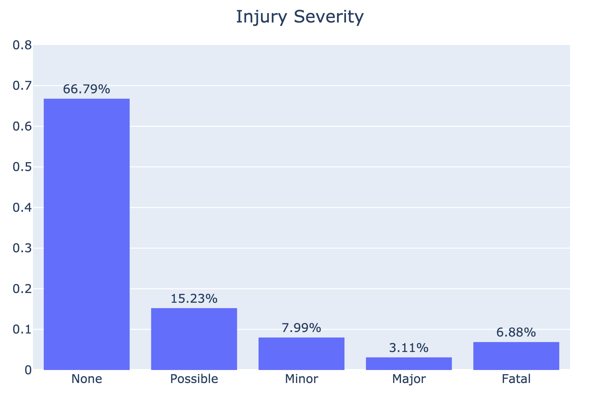

In [51]:
img = Image.open("assets/injury_severity_histogram.png")
display(img.resize((600, 400)))

Similar to injury severity, we label vehicle deformity by the worst damage sustained by a vehicle in an accident. So if one car sustained minor damage, and the other sustained major damage, that acccident is labeled as having major damage in vehicle deformity. Where in most accidents the person involved is not injured, it is the opposite for vehicle damage. If a vehicle is involed in an accident, there is only a 2.4% chance that there is no deformity, and the most likely outcome is that the vehicle was severely deformed.

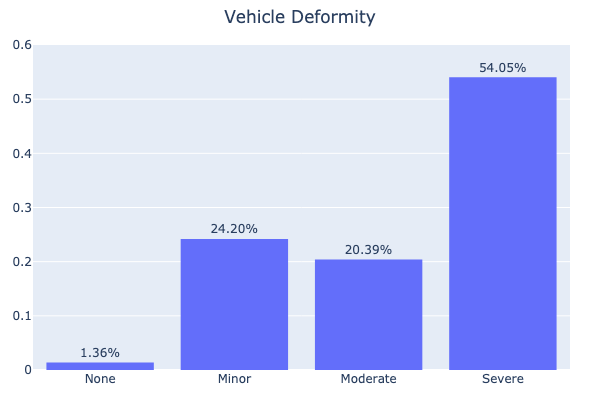

In [52]:
img = Image.open("assets/vehicle_deformity_histogram.png")
display(img.resize((600, 400)))

# Tests for Independence

In order to understand if a relationship exists between our features and reponse variables, we computed contingeny tables for several features that we believed would be key for our predictions. The features we chose were:
- `DRINKING`: Was drinking a factor in the accident
- `DRUGS`: Was drug use a factor in the accident
- `SPEEDREL`: Was excessive speed a factor in the accident
- `WEATHER`: Was the weather clear or were there atmoshperic conditions
- `TIME`: Was the accident in morning, afternoon, or night

Relative to the response variables:

- `INJ_SEV`: The worst injury sustained in the accident
- `DEFORMED`: The worst level of damage a vehicle sustained in the accident

The contingency tables can be seen below:

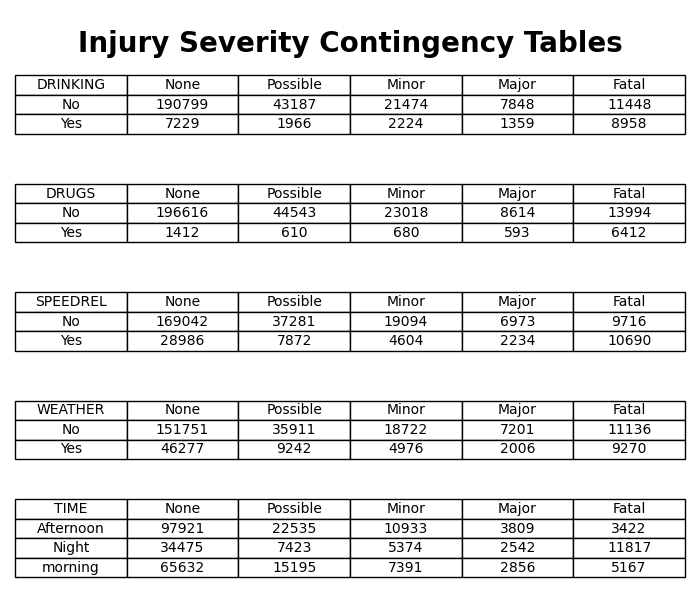

In [58]:
img = Image.open("assets/inj_sev_contingencies.png")
display(img)

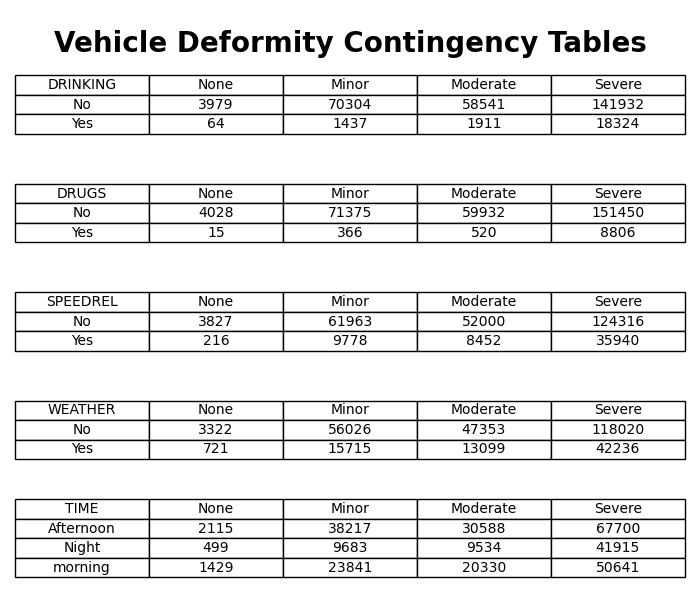

In [59]:
img = Image.open("assets/deformity_contingencies.png")
display(img)

By examining the contingency tables, it's quite obvious that there exists a relationship between the selected features and the reponse variables. That is, the counts of the injury severity type and the vehicle deformity type vary widely within features. Performing chi-squared tests for independence on all relationships yielded p-values of zero, leading us to reject the null hypotheses that each feature-response relationship is independent.The chi-squared test statistics for each hypothesis test are given below:

In [63]:
tstats = pd.read_csv("assets/chi_sq_tstats.csv", index_col = 0).round(2)
tstats

,Injury Severity,Vehicle Deformity
Drinking,45598.54,8713.07
Drugs,55987.76,5446.56
Speed Related,17863.75,4072.25
Weather Related,5590.84,912.17
Time,20045.61,6577.97
